In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-lifetime-value-analytics-case-study/customer_acquisition_data.csv


In [2]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
tips = sns.load_dataset("tips")

# Case Study: E-commerce Store

## Background:

ABC Electronics is an online retailer specializing in consumer electronics. They have been in operation for several years and have built a substantial customer base. ABC Electronics wants to understand the lifetime value of their customers to optimize their marketing strategies and improve customer retention.

Objectives:

Calculate the customer lifetime value for different segments of customers.
Identify the most valuable customer segments.
Develop personalized marketing strategies to increase customer retention and maximize CLV.

# Objectives:

Calculate the customer lifetime value for different segments of customers.

Identify the most valuable customer segments.

Develop personalized marketing strategies to increase customer retention and maximize CLV.

In [3]:
url = '/kaggle/input/customer-lifetime-value-analytics-case-study/customer_acquisition_data.csv'


In [4]:
df = pd.read_csv(url)
display(df)

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419
...,...,...,...,...,...
795,796,social media,9.546326,0.167592,2813
796,797,email marketing,5.246263,0.043822,3439
797,798,social media,9.546326,0.167592,2101
798,799,paid advertising,30.450327,0.016341,813


In [5]:
# corr() method finds the correlation of each column in a DataFrame.
df[['cost','conversion_rate','revenue']].corr()

,cost,conversion_rate,revenue
cost,1.000000,-0.537430,0.018642
conversion_rate,-0.537430,1.000000,-0.050456
revenue,0.018642,-0.050456,1.000000


<Axes: >

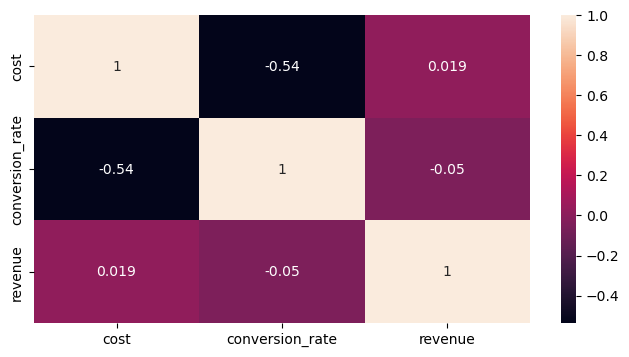

In [6]:
plt.figure(figsize=(8,4))
sns.heatmap(df[['cost','conversion_rate','revenue']].corr(), annot=True)

## What is Average Order Value?

## Average Order Value (AOV)  

Is an ecommerce metric that measures the average total of every order placed with a merchant over a defined period of time. AOV is one of the most important metrics for online stores to be aware of, driving key business decisions such as advertising spend, store layout, and product pricing.

Revenue/Number of orders = Average Order Value


In [7]:
#aov 
total_revenue = df['revenue'].sum()
total_orders =df['customer_id'].count()

aov = total_revenue/total_orders
print('The Average Order Value (AOV) is', aov)



The Average Order Value (AOV) is 2769.15125


In [8]:
df['AOV'] = df['revenue']/800
df

,customer_id,channel,cost,conversion_rate,revenue,AOV
0,1,referral,8.320327,0.123145,4199,5.24875
1,2,paid advertising,30.450327,0.016341,3410,4.26250
2,3,email marketing,5.246263,0.043822,3164,3.95500
3,4,social media,9.546326,0.167592,1520,1.90000
4,5,referral,8.320327,0.123145,2419,3.02375
...,...,...,...,...,...,...
795,796,social media,9.546326,0.167592,2813,3.51625
796,797,email marketing,5.246263,0.043822,3439,4.29875
797,798,social media,9.546326,0.167592,2101,2.62625
798,799,paid advertising,30.450327,0.016341,813,1.01625


In [9]:
# purchase frequency
purchase_frequency = 800/800

print('Purchase Frequency is', purchase_frequency)

Purchase Frequency is 1.0


In [10]:
df['gross_profit']=df['revenue']-df['cost']

![](https://delighted.com/wp-content/uploads/2022/06/calculation-clv-4-2x.png)

In [11]:
df['clv']=df['gross_profit']* df['conversion_rate'] / df['cost']
df

,customer_id,channel,cost,conversion_rate,revenue,AOV,gross_profit,clv
0,1,referral,8.320327,0.123145,4199,5.24875,4190.679673,62.024146
1,2,paid advertising,30.450327,0.016341,3410,4.26250,3379.549673,1.813671
2,3,email marketing,5.246263,0.043822,3164,3.95500,3158.753737,26.385185
3,4,social media,9.546326,0.167592,1520,1.90000,1510.453674,26.517043
4,5,referral,8.320327,0.123145,2419,3.02375,2410.679673,35.679260
...,...,...,...,...,...,...,...,...
795,796,social media,9.546326,0.167592,2813,3.51625,2803.453674,49.216538
796,797,email marketing,5.246263,0.043822,3439,4.29875,3433.753737,28.682270
797,798,social media,9.546326,0.167592,2101,2.62625,2091.453674,36.716893
798,799,paid advertising,30.450327,0.016341,813,1.01625,782.549673,0.419964


![](https://www.ispringsolutions.com/blog/wp-content/uploads/editor/2019/06/ispring-blog-image-1559847448.png)

[](https://www.ispringsolutions.com/blog/wp-content/uploads/editor/2019/06/ispring-blog-image-1559847448.png)

In [12]:
df['roi'] = df['revenue']-df['cost']/df['cost']
df['roi'] = df['roi']
df

,customer_id,channel,cost,conversion_rate,revenue,AOV,gross_profit,clv,roi
0,1,referral,8.320327,0.123145,4199,5.24875,4190.679673,62.024146,4198.0
1,2,paid advertising,30.450327,0.016341,3410,4.26250,3379.549673,1.813671,3409.0
2,3,email marketing,5.246263,0.043822,3164,3.95500,3158.753737,26.385185,3163.0
3,4,social media,9.546326,0.167592,1520,1.90000,1510.453674,26.517043,1519.0
4,5,referral,8.320327,0.123145,2419,3.02375,2410.679673,35.679260,2418.0
...,...,...,...,...,...,...,...,...,...
795,796,social media,9.546326,0.167592,2813,3.51625,2803.453674,49.216538,2812.0
796,797,email marketing,5.246263,0.043822,3439,4.29875,3433.753737,28.682270,3438.0
797,798,social media,9.546326,0.167592,2101,2.62625,2091.453674,36.716893,2100.0
798,799,paid advertising,30.450327,0.016341,813,1.01625,782.549673,0.419964,812.0


## Cost By Chanel

<Axes: xlabel='channel', ylabel='cost'>

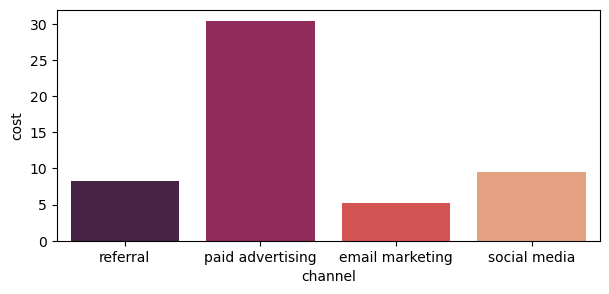

In [13]:
plt.figure(figsize=(7, 3))
sns.barplot(df, x='channel', y='cost', palette='rocket')


## Revenue by Chanel

<Axes: xlabel='channel', ylabel='revenue'>

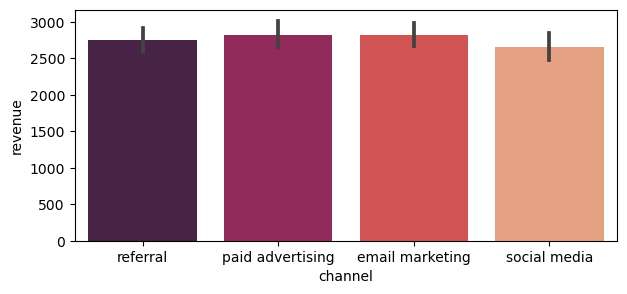

In [14]:
plt.figure(figsize=(7, 3))
sns.barplot(df, x='channel', y='revenue',palette='rocket')

## ROI By Chanel

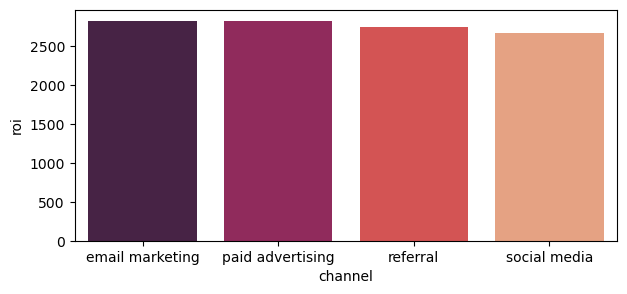

In [15]:
plt.figure(figsize=(7, 3))
roi_by_channel = df.groupby('channel')['roi'].mean().reset_index()

sns.barplot(roi_by_channel, x='channel', y='roi',palette='rocket');

## Conversion rate by channel

<Axes: xlabel='channel', ylabel='conversion_rate'>

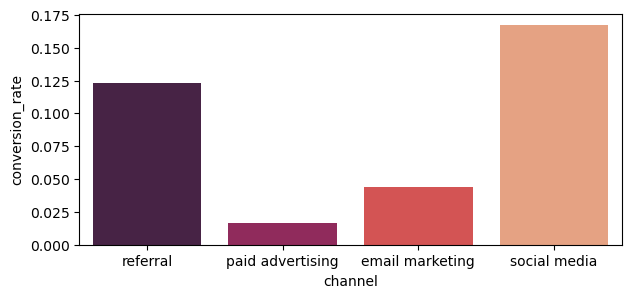

In [16]:
plt.figure(figsize=(7, 3))
sns.barplot(df,x='channel', y='conversion_rate', palette='rocket')

In [17]:
# Grouping the data based on 'channel'
channel_groups = df.groupby('channel')


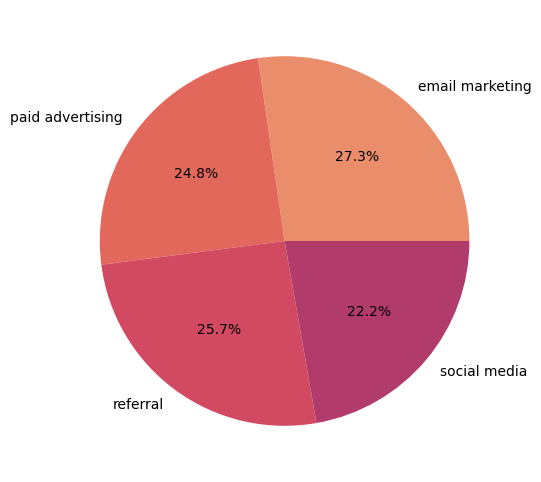

In [18]:
revenue_by_channel = channel_groups['revenue'].sum().reset_index()

fig, ax = plt.subplots(figsize=(8, 6))
plt.pie(revenue_by_channel['revenue'], 
        labels=revenue_by_channel['channel'], 
        autopct='%1.1f%%',
        colors=sns.color_palette("flare"));

# Customer Lifetime Value (CLTV)

Customer lifetime value is a measurement of how valuable a customer is to your company, not just on a purchase-by-purchase basis but across entire customer relationships.

## CLTV = [(revenue - cost) * conversion_rate]/cost

In [19]:
df['cltv']= (df['revenue']-df['cost']*df['conversion_rate'])/df['cost']
df

,customer_id,channel,cost,conversion_rate,revenue,AOV,gross_profit,clv,roi,cltv
0,1,referral,8.320327,0.123145,4199,5.24875,4190.679673,62.024146,4198.0,504.544536
1,2,paid advertising,30.450327,0.016341,3410,4.26250,3379.549673,1.813671,3409.0,111.969319
2,3,email marketing,5.246263,0.043822,3164,3.95500,3158.753737,26.385185,3163.0,603.052103
3,4,social media,9.546326,0.167592,1520,1.90000,1510.453674,26.517043,1519.0,159.055972
4,5,referral,8.320327,0.123145,2419,3.02375,2410.679673,35.679260,2418.0,290.610630
...,...,...,...,...,...,...,...,...,...,...
795,796,social media,9.546326,0.167592,2813,3.51625,2803.453674,49.216538,2812.0,294.500754
796,797,email marketing,5.246263,0.043822,3439,4.29875,3433.753737,28.682270,3438.0,655.470364
797,798,social media,9.546326,0.167592,2101,2.62625,2091.453674,36.716893,2100.0,219.917085
798,799,paid advertising,30.450327,0.016341,813,1.01625,782.549673,0.419964,812.0,26.682879


<Axes: xlabel='channel', ylabel='cltv'>

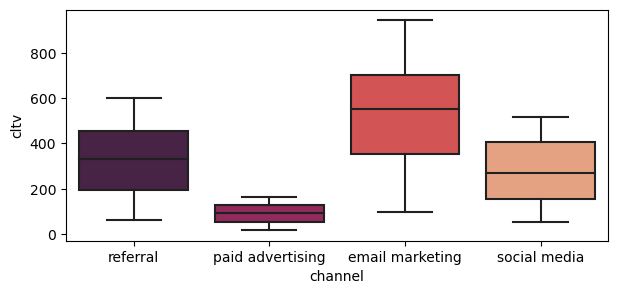

In [20]:
plt.figure(figsize=(7, 3))
sns.boxplot(df,x='channel', y='cltv', palette='rocket')

<Axes: xlabel='channel', ylabel='cltv'>

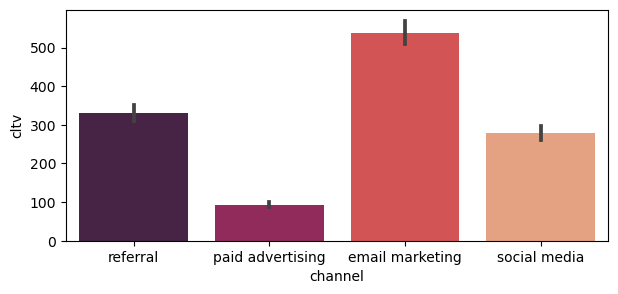

In [21]:
plt.figure(figsize=(7, 3))
sns.barplot(df,x='channel', y='cltv', palette='rocket')

# Segmentation and Analysis:
ABC Electronics segments their customers into three groups based on CLVT:

High-Value Customers: Customers with CLV in the top 20% percentile. These customers generate the most revenue for the business.

Medium-Value Customers: Customers with CLV in the middle 60% percentile. These customers contribute to the overall revenue and have decent long-term potential.

Low-Value Customers: Customers with CLV in the bottom 20% percentile. These customers have low spending patterns and may require additional nurturing to increase their CLV.

In [22]:
average_clv = df['cltv'].mean()
average_clv

316.58215441066625

In [23]:
df['Customer_Value'] = ['High' if clv > average_clv else 'Low' for clv in df['clv']]


In [24]:
df

,customer_id,channel,cost,conversion_rate,revenue,AOV,gross_profit,clv,roi,cltv,Customer_Value
0,1,referral,8.320327,0.123145,4199,5.24875,4190.679673,62.024146,4198.0,504.544536,Low
1,2,paid advertising,30.450327,0.016341,3410,4.26250,3379.549673,1.813671,3409.0,111.969319,Low
2,3,email marketing,5.246263,0.043822,3164,3.95500,3158.753737,26.385185,3163.0,603.052103,Low
3,4,social media,9.546326,0.167592,1520,1.90000,1510.453674,26.517043,1519.0,159.055972,Low
4,5,referral,8.320327,0.123145,2419,3.02375,2410.679673,35.679260,2418.0,290.610630,Low
...,...,...,...,...,...,...,...,...,...,...,...
795,796,social media,9.546326,0.167592,2813,3.51625,2803.453674,49.216538,2812.0,294.500754,Low
796,797,email marketing,5.246263,0.043822,3439,4.29875,3433.753737,28.682270,3438.0,655.470364,Low
797,798,social media,9.546326,0.167592,2101,2.62625,2091.453674,36.716893,2100.0,219.917085,Low
798,799,paid advertising,30.450327,0.016341,813,1.01625,782.549673,0.419964,812.0,26.682879,Low


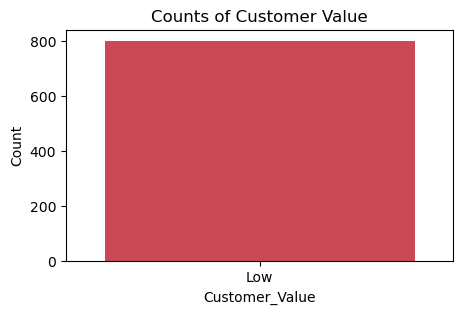

In [25]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.countplot(df, x='Customer_Value', color='#e13342')
plt.ylabel('Count')
plt.title('Counts of Customer Value')
plt.show()


In [26]:
print(sns.color_palette("rocket").as_hex())

['#35193e', '#701f57', '#ad1759', '#e13342', '#f37651', '#f6b48f']


# The most valuable customer segments.

The most customer segments are in email marketing, despite all the channels have similar ROI and revenue, the greatest CLVT is in email marketing, it allows ABC Eletronics to sell to this public more than just one time. 


Monitoring and Evaluation:
ABC Electronics continuously monitors the effectiveness of their marketing strategies by tracking CLV over time and assessing changes in customer behavior. They analyze metrics such as repeat purchase rate, average order value, and customer retention rate to evaluate the success of their initiatives.

By leveraging CLV analytics, ABC Electronics can allocate their marketing resources effectively, focus on customer segments with the highest potential, and develop strategies to maximize customer retention and long-term profitability.

This case study demonstrates the practical application of CLV analytics in a real-world scenario and highlights the importance of data-driven decision-making for optimizing business performance.